In [2]:
import numpy as np
import pandas as pd

# Load the dataset
df=pd.read_csv("WebTraffic_Q1_2025 - WebTraffic_Q1_2025.csv.csv")
# df=pd.read_excel(""WebTraffic_Q1_2025 - WebTraffic_Q1_2025.csv.csv"")

df.to_csv("WebTraffic_Q1_2025 - WebTraffic_Q1_2025.csv.csv")

# Preview the first few rows
df.shape

(600, 8)

In [3]:
# Check missing value
df.isna().sum()
# df.dtypes

VisitDate           0
SessionDuration    12
PageViews           9
ReferralSource      0
DeviceType          0
Platform            0
BounceRate          0
Conversions         0
dtype: int64

In [7]:
# Handling missing value
df["SessionDuration"] = df["SessionDuration"].fillna(df["SessionDuration"].mean())
df["PageViews"] = df["PageViews"].fillna(df["PageViews"].mean())


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isna().sum()

VisitDate          0
SessionDuration    0
PageViews          0
ReferralSource     0
DeviceType         0
Platform           0
BounceRate         0
Conversions        0
dtype: int64

In [11]:
df

,VisitDate,SessionDuration,PageViews,ReferralSource,DeviceType,Platform,BounceRate,Conversions
0,2025-03-17,140.78,3.0,Referral,Tablet,Windows,88.24,1
1,2025-01-03,903.04,3.0,Paid Search,Tablet,Windows,48.78,0
2,2025-02-25,395.02,5.0,Social Media,Mobile,macOS,51.13,0
3,2025-01-29,273.88,6.0,Referral,Desktop,macOS,60.36,0
4,2025-03-23,50.89,5.0,Organic Search,Mobile,Linux,88.83,1
...,...,...,...,...,...,...,...,...
595,2025-02-19,192.71,4.0,Organic Search,Mobile,Linux,58.28,0
596,2025-03-15,330.39,3.0,Social Media,Desktop,iOS,58.24,0
597,2025-01-14,56.74,6.0,Organic Search,Mobile,macOS,26.26,0
598,2025-01-14,64.07,4.0,Social Media,Mobile,macOS,49.26,0


In [12]:
df.isna().sum()
df.dtypes

VisitDate           object
SessionDuration    float64
PageViews          float64
ReferralSource      object
DeviceType          object
Platform            object
BounceRate         float64
Conversions          int64
dtype: object

In [14]:
# Summary statistics for numerical columns
summary_stats=df[['SessionDuration','PageViews','BounceRate']].describe()
summary_stats

# df.describe()

,SessionDuration,PageViews,BounceRate
count,600.000000,600.000000,600.000000
mean,310.725578,4.944162,55.129400
std,307.543532,2.254714,20.421366
min,1.520000,0.000000,20.500000
25%,85.865000,3.000000,36.917500
50%,222.015000,5.000000,55.350000
75%,432.522500,6.000000,72.657500
max,2451.730000,12.000000,89.950000


In [15]:
# Correlation matrix
correlation_matrix=df[['SessionDuration','PageViews','BounceRate']].corr()
correlation_matrix

,SessionDuration,PageViews,BounceRate
SessionDuration,1.000000,0.056622,-0.012174
PageViews,0.056622,1.000000,-0.043186
BounceRate,-0.012174,-0.043186,1.000000


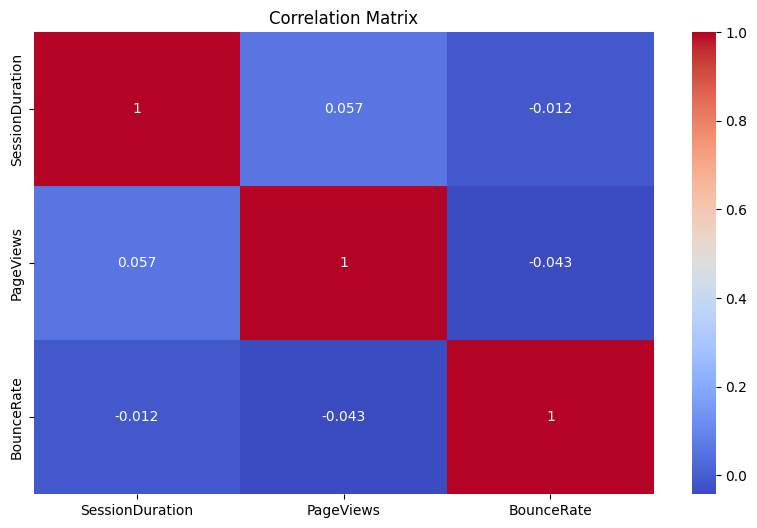

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Top 5 ReferralSource by SessionDuration
top_products = df.groupby('ReferralSource')['SessionDuration'].sum().nlargest(5)

top_products

ReferralSource
Paid Search       39260.476735
Referral          32470.571156
Direct            31883.446735
Social Media      29524.261156
Organic Search    28021.930000
Name: SessionDuration, dtype: float64

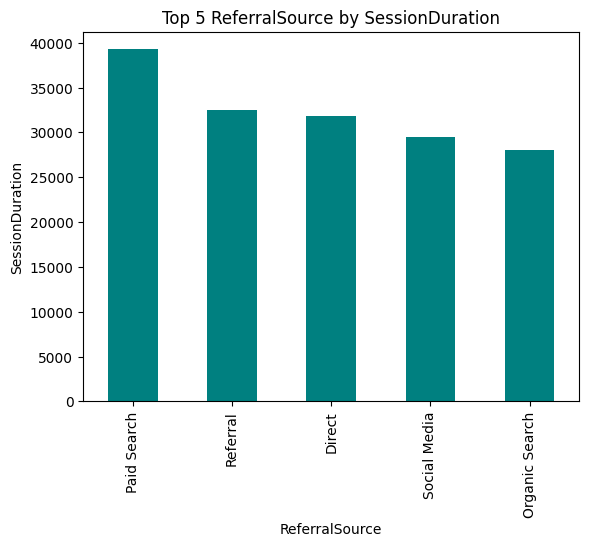

In [19]:
# Plot the bar chart
top_products.plot(kind='bar', color='teal')
plt.title('Top 5 ReferralSource by SessionDuration')
plt.xlabel('ReferralSource')
plt.ylabel('SessionDuration')
plt.show()

In [23]:
# VisitDate sales trend
monthly_sales = df.groupby('VisitDate')['PageViews'].sum()

monthly_sales

VisitDate
2025-01-01    56.000000
2025-01-02    36.944162
2025-01-03    28.000000
2025-01-04    22.000000
2025-01-05    42.000000
                ...    
2025-03-27    47.000000
2025-03-28    51.000000
2025-03-29    23.000000
2025-03-30    26.000000
2025-03-31    16.000000
Name: PageViews, Length: 89, dtype: float64

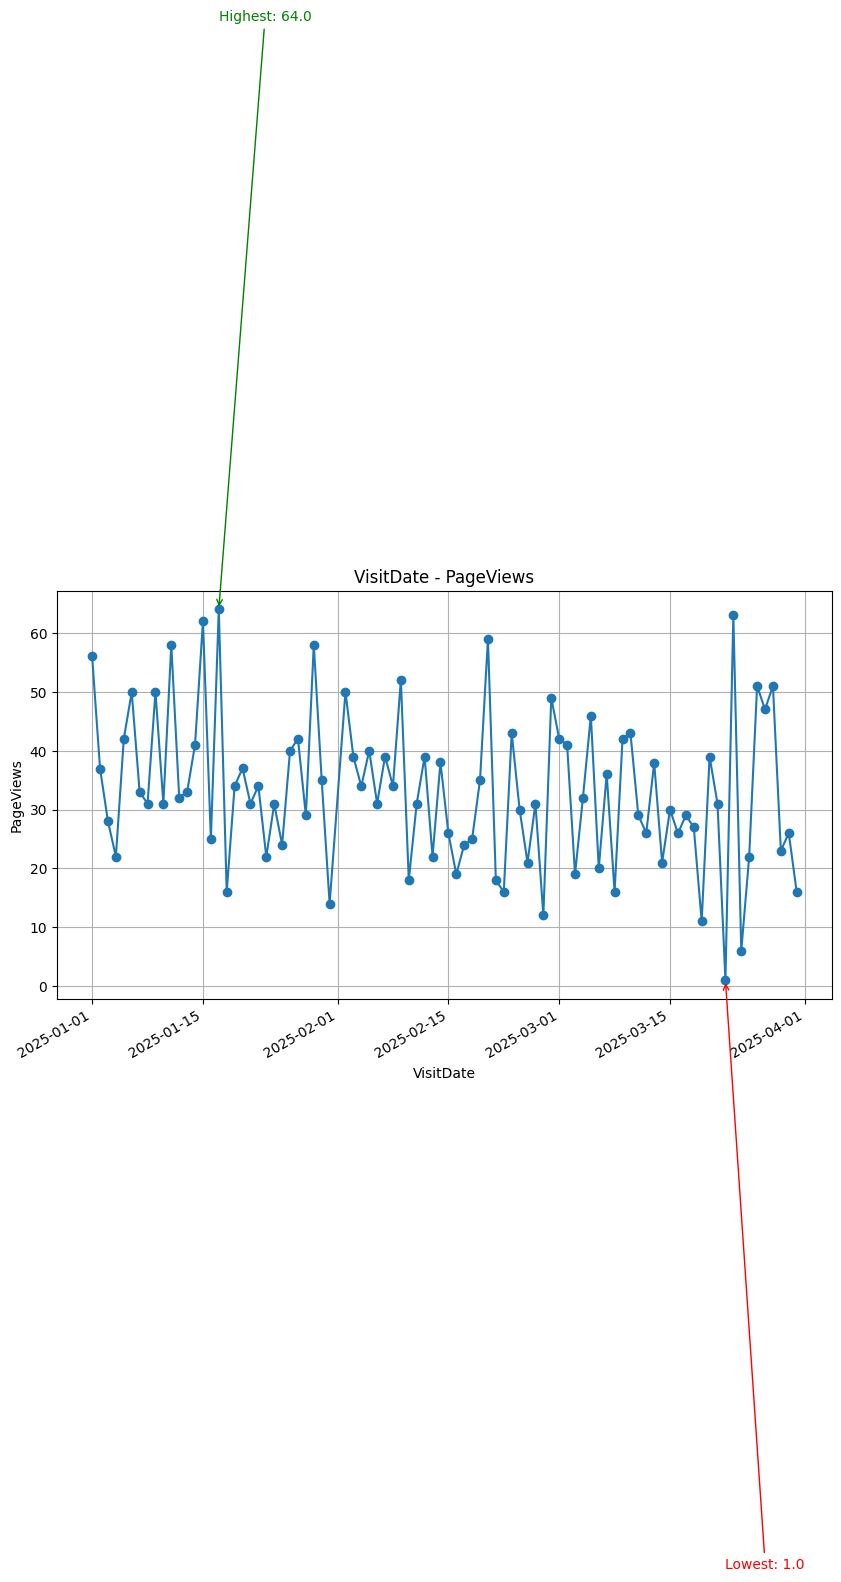

In [30]:
# Force convert index to datetime (works always)
monthly_sales.index = pd.to_datetime(monthly_sales.index)

# Plot the line chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('VisitDate - PageViews')
plt.xlabel('VisitDate')
plt.ylabel('PageViews')

# Annotate highest and lowest months
max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()

plt.annotate(
    f'Highest: {monthly_sales[max_month]}',
    xy=(max_month, monthly_sales[max_month]),
    xytext=(max_month, monthly_sales[max_month] + 100),
    arrowprops=dict(arrowstyle='->', color='green'),
    color='green'
)

plt.annotate(
    f'Lowest: {monthly_sales[min_month]}',
    xy=(min_month, monthly_sales[min_month]),
    xytext=(min_month, monthly_sales[min_month] - 100),
    arrowprops=dict(arrowstyle='->', color='red'),
    color='red'
)

plt.grid(True)
plt.show()


In [32]:
# Sales by region
region_sales = df.groupby('Platform')['SessionDuration'].sum()

region_sales

Platform
Android    26306.290000
Linux      41664.022313
Windows    32254.786735
iOS        45007.692313
macOS      41202.555578
Name: SessionDuration, dtype: float64

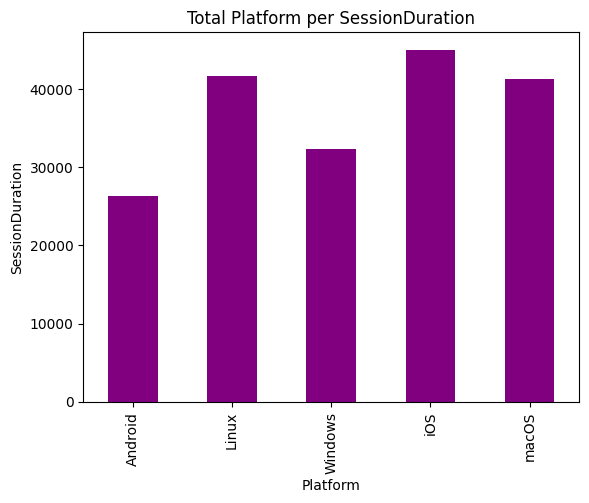

The region with the highest sales is iOS with a revenue of 45007.692312925166.


In [33]:
# Plot the bar chart
region_sales.plot(kind='bar', color='purple')
plt.title('Total Platform per SessionDuration')
plt.xlabel('Platform')
plt.ylabel('SessionDuration')
plt.show()

# Identify region with highest sales growth
growth_region = region_sales.idxmax()
growth_value = region_sales.max()
print(f'The region with the highest sales is {growth_region} with a revenue of {growth_value}.')

In [34]:
df

,VisitDate,SessionDuration,PageViews,ReferralSource,DeviceType,Platform,BounceRate,Conversions
0,2025-03-17,140.78,3.0,Referral,Tablet,Windows,88.24,1
1,2025-01-03,903.04,3.0,Paid Search,Tablet,Windows,48.78,0
2,2025-02-25,395.02,5.0,Social Media,Mobile,macOS,51.13,0
3,2025-01-29,273.88,6.0,Referral,Desktop,macOS,60.36,0
4,2025-03-23,50.89,5.0,Organic Search,Mobile,Linux,88.83,1
...,...,...,...,...,...,...,...,...
595,2025-02-19,192.71,4.0,Organic Search,Mobile,Linux,58.28,0
596,2025-03-15,330.39,3.0,Social Media,Desktop,iOS,58.24,0
597,2025-01-14,56.74,6.0,Organic Search,Mobile,macOS,26.26,0
598,2025-01-14,64.07,4.0,Social Media,Mobile,macOS,49.26,0


In [36]:
customer_data = df.groupby('ReferralSource').agg({
    'PageViews': 'count',
    'SessionDuration': 'mean'
}).rename(columns={
    'PageViews': 'VisitFrequency',
    'SessionDuration': 'AvgSessionTime'
})

print(customer_data)


                VisitFrequency  AvgSessionTime
ReferralSource                                
Direct                      98      325.341293
Email                      101      250.244170
Organic Search              95      294.967684
Paid Search                109      360.187860
Referral                    98      331.332359
Social Media                99      298.224860


In [39]:
# Create pseudo-customer behavior using Platform (or DeviceType)
customer_data = df.groupby('Platform').agg({
    'PageViews': 'count',
    'SessionDuration': 'mean'
}).rename(columns={
    'PageViews': 'PurchaseFrequency',
    'SessionDuration': 'AvgOrderValue'
})

# Classification function
def classify_customer(row):
    if row['AvgOrderValue'] >= 500 and row['PurchaseFrequency'] >= 50:
        return 'High Value'
    elif row['AvgOrderValue'] >= 200:
        return 'Medium Value'
    else:
        return 'Low Value'

customer_data['Category'] = customer_data.apply(classify_customer, axis=1)

category_counts = customer_data['Category'].value_counts()

category_counts


Category
Medium Value    5
Name: count, dtype: int64

In [40]:
customer_data

,PurchaseFrequency,AvgOrderValue,Category
Platform,,,
Android,96,274.023854,Medium Value
Linux,124,336.000180,Medium Value
Windows,107,301.446605,Medium Value
iOS,136,330.938914,Medium Value
macOS,137,300.748581,Medium Value


Medium Value customers: 5


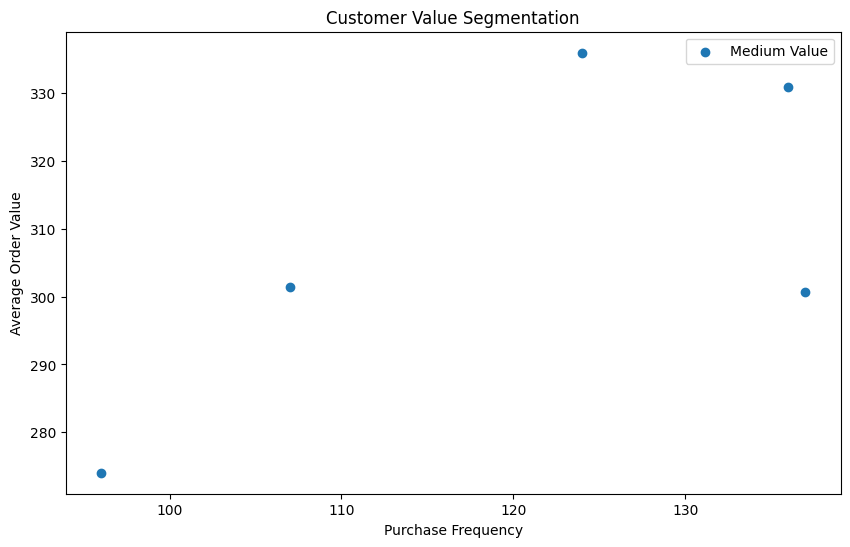

In [41]:
# Scatter plot
plt.figure(figsize=(10, 6))

for label, group in customer_data.groupby('Category'):
    print(f'{label} customers: {len(group)}')
    plt.scatter(group['PurchaseFrequency'], group['AvgOrderValue'], label=label)

plt.xlabel('Purchase Frequency')
plt.ylabel('Average Order Value')
plt.title('Customer Value Segmentation')
plt.legend()
plt.show()

# customer_data.groupby("Category")["AvgOrderValue"].sum()